In [4]:
import sys

import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
data = pd.read_csv('data/kc_house_data.csv', index_col=['id'])

In [6]:
print(data.shape) # checking out the dataset dimensions

(21613, 20)


In [7]:
print(data.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [8]:
print(data.price.value_counts())

450000.0     172
350000.0     172
550000.0     159
500000.0     152
425000.0     150
325000.0     148
400000.0     145
375000.0     138
300000.0     133
525000.0     131
250000.0     130
475000.0     120
330000.0     119
650000.0     117
275000.0     113
315000.0     111
415000.0     111
280000.0     110
600000.0     110
390000.0     110
440000.0     109
320000.0     108
435000.0     105
340000.0     103
310000.0     101
335000.0      98
420000.0      97
360000.0      96
260000.0      95
265000.0      95
            ... 
1544500.0      1
431750.0       1
234975.0       1
1151250.0      1
804995.0       1
870515.0       1
475500.0       1
225900.0       1
1825000.0      1
394250.0       1
739999.0       1
838300.0       1
386380.0       1
369990.0       1
805500.0       1
3120000.0      1
271675.0       1
2888000.0      1
402723.0       1
369946.0       1
739888.0       1
772650.0       1
304400.0       1
644000.0       1
543200.0       1
641500.0       1
575950.0       1
674250.0      

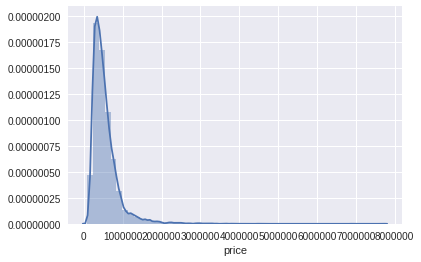

In [10]:
sns.distplot(data.price);

##### Now that we've seen the distribution of the house prices, let's try to create a regressor which predicts prices

In [12]:
from sklearn.model_selection import train_test_split

train_no_sale_price = data.drop(labels=['price'], axis=1)
train_sale_price = data['price']

x_train, x_test, y_train, y_test = train_test_split(train_no_sale_price,
                                                    train_sale_price,
                                                    test_size=0.3,
                                                    random_state=1234)


We've split the dataset into two distinct sets - a train set(**x_train** and **y_train**) and a test set(**x_test** and **y_test**).

Having done this, we can start playing around with linear regression.

In [15]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

ValueError: could not convert string to float: '20150320T000000'

Seems like the dataset contains some non-numeric values... let's take care of that!

In [20]:
print((x_train.values == '20150320T000000').sum())

41


Seems like there are 41 occurences of the given string. The string itself seems to be a date representation. So there are no guarantees that these 41 occurences are the only occurences of data strings. They only represent the dates with string representations with the format of 20150320T000000. There might be a lot more dates in the dataset.

Let's just spare us some time and fetch all the numeric columns:

In [22]:
x_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15129.000000,15129.000000,15129.000000,1.512900e+04,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000,15129.000000
mean,3.372596,2.111756,2075.898605,1.495791e+04,1.491672,0.007139,0.229956,3.413709,7.658206,1782.579285,293.319321,1970.865688,81.373653,98078.252627,47.560608,-122.214951,1983.911032,12822.702294
std,0.940548,0.770616,920.551161,4.056106e+04,0.540314,0.084191,0.756034,0.652336,1.176279,828.131269,444.502797,29.262101,394.668635,53.451470,0.138058,0.141026,685.933210,27525.488848
min,0.000000,0.000000,380.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,3.000000,1.750000,1420.000000,5.060000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472900,-122.329000,1480.000000,5100.000000
50%,3.000000,2.250000,1900.000000,7.634000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1974.000000,0.000000,98065.000000,47.571800,-122.232000,1830.000000,7620.000000
75%,4.000000,2.500000,2540.000000,1.065500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,570.000000,1996.000000,0.000000,98118.000000,47.678200,-122.126000,2360.000000,10103.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [24]:
numeric_column_names = x_train.describe().columns
print(numeric_column_names)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


We should be fine now...

In [26]:
regressor.fit(x_train[numeric_column_names], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Hooray!

There were no NaN, null or other ambiguous values in the dataset.
We were able to successfully train a model using Linear regression.

In [46]:
print("train score:", regressor.score(x_train[numeric_column_names], y_train))

train score: 0.698534359526


Uh-oh... I don't know about you, but this doesn't look very pretty to me :(

On we continue with our training journeys!

Before we do anything significant, let's take a look at the sales predictions with the current model:

[ 187719.02926948  330759.38301103  509208.58667343  256172.67668577
  531645.39497746]


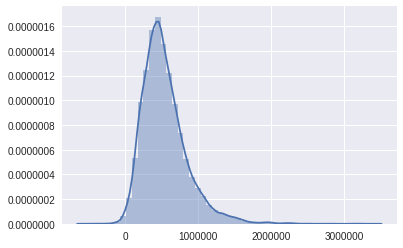

In [30]:
predictions = regressor.predict(x_train[numeric_column_names])

print(predictions[:5])

sns.distplot(predictions);

And here's the error distribution:

id
1323089056   -251281.0
1395500020     50859.0
8024200010    197209.0
3821000100      6223.0
1422029138    -33355.0
Name: price, dtype: float64


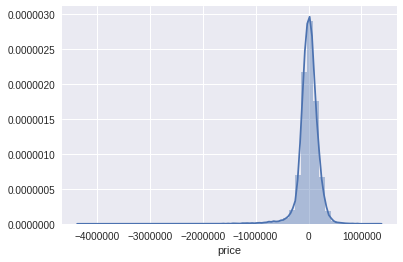

In [33]:
differences = (predictions - y_train).round(0)

print(differences[:5])

sns.distplot(differences);

We can plot and see the deviation of our model predictions related to the real values(the further from the line, the worse the prediction):

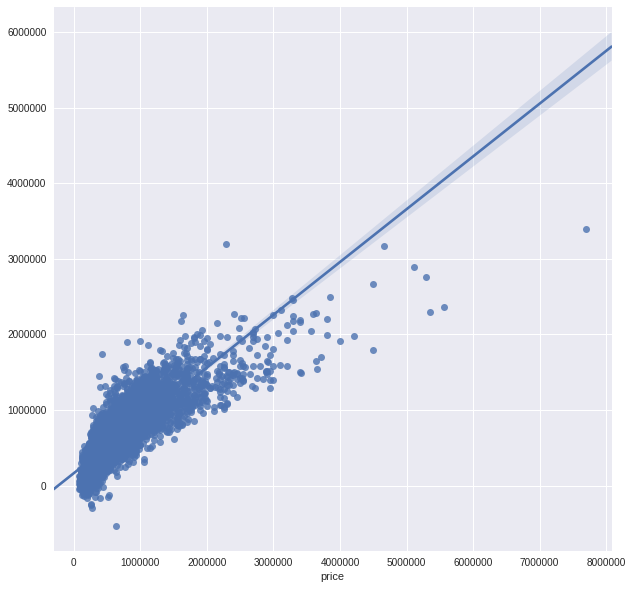

In [37]:
plt.figure(figsize=(10,10))
sns.regplot(y_train, predictions)
plt.grid(True)
plt.show()

##### Up until now, we've worked with the train set only.

##### Let's switch things up and see how our model performs with the test set.

[ 504628.94161347  544170.49584591  972896.48998554  411228.30926217
  465779.62855501]


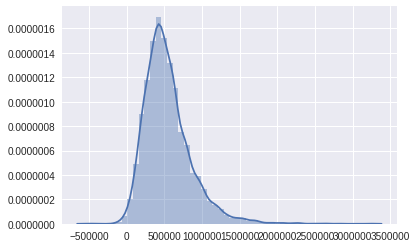

In [42]:
predictions_test = regressor.predict(x_test[numeric_column_names])

print(predictions_test[:5])

sns.distplot(predictions_test);

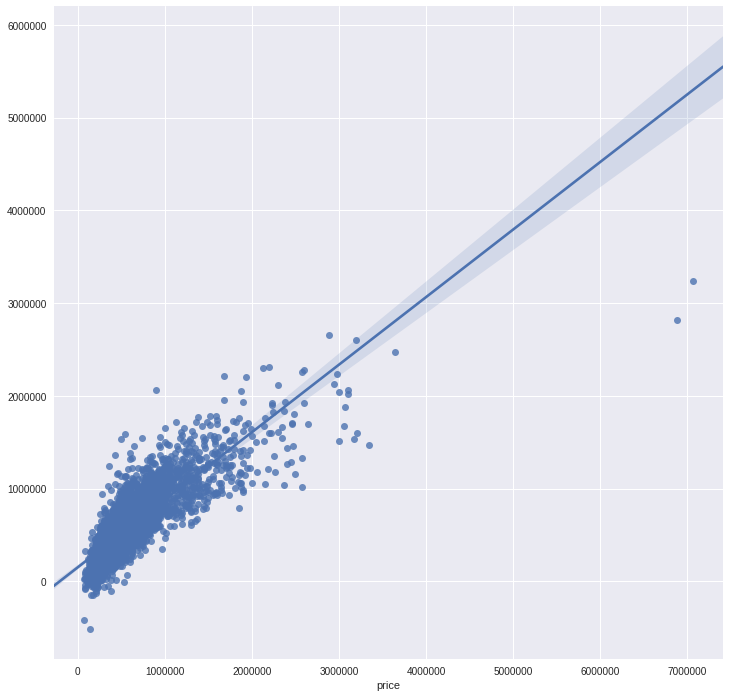

In [43]:
plt.figure(figsize=(12,12))
sns.regplot(y_test, predictions_test)
plt.grid(True)
plt.show()

In [47]:
print("test score:", regressor.score(x_test[numeric_column_names], y_test))

test score: 0.702059416773


#### Hmm...
 
Our train score was: 0.698534359526

And now we know that the test score is: 0.702059416773

Our model surely isn't overfitting, but doesn't generalize well... for now.